# Flatiron Phase 4 Project

* <b>Name:</b> James Benedito
* <b>Pace:</b> Part-Time
* <b>Instructor:</b> Morgan Jones

# Abstract

In this Jupyter notebook, I

# Business Problem

When it comes to business in general, it is important to make informed decisions on where to invest funds because a high ROI is imperative for a company to thrive. Data is a powerful tool that can be leveraged to determine where huge profits can potentially be gained in the future. 

This Jupyter notebook will examine time series data from Zillow to highlight the <b>Top 5 zipcodes in Clark County, Nevada</b> to invest in. Clark County is the largest district in Nevada state, encompassing all of Las Vegas, and is the fourth-largest district in the United States. My theoretical stakeholder is a real estate company located in Las Vegas, Nevada, who are seeking out the best locations for their clients. 

My suggestions to the real estate company will be informed by an <b>ARIMA model</b> with optimized parameters. This chosen ARIMA model will be used for <b>forecasting</b>, using previous ROI information to project potential ROI for various zipcodes in the Clark County area. From this <b>projected ROI</b> metric, I will construct my recommendations. 

# Dataset 

The data used for this project comes from Zillow and is stored in a file called <b>zillow_data.csv</b>. The dataset shows mean housing prices over time, with each row representing a specific zipcode in a particular US city. As mentioned previously, I will be focusing on merely a subset of this data. The dataframe will be filtered so that it only includes houses located in Nevada. 

# Data Exploration and Preprocessing

To start, I will explore the Zillow dataset to see how it is set up. From <b>.head()</b>, we see that the dataset has <b>272 columns</b>. Most of these columns represent dates in time and house the median price of houses for a particular zipcode. The other columns include <b>RegionID</b>, <b>RegionName</b>, <b>City</b>, <b>State</b>, <b>Metro</b>, <b>CountyName</b>, and <b>SizeRank</b>. We see that the data is quite expansive, encompassing information from many different cities and counties across the United States. As mentioned earlier, I want to filter the data so that it focuses merely on zipcodes in <b>Nevada</b> state because that is where the theoretical real estate company is based. From the main dataframe <b>zillow_df</b>, I will create a subset called <b>nv_df</b> that only has data on Nevada zipcodes. 

In [1]:
# import necessary packages
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller

In [2]:
# read dataset into pandas df
zillow_df = pd.read_csv('zillow_data.csv')
zillow_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [3]:
# filter dataset so it only includes zipcodes in Nevada 
nv_df = zillow_df[zillow_df['State']=='NV']
nv_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
115,95804,89108,Las Vegas,NV,Las Vegas,Clark,116,102500.0,102500.0,102500.0,...,180400,183300,186600,190200,193400,197300,200700,203500,206600,209300
173,95817,89121,Las Vegas,NV,Las Vegas,Clark,174,106800.0,107000.0,107200.0,...,183200,185500,188600,192500,195500,198700,201500,204000,206700,208600
195,95813,89117,Las Vegas,NV,Las Vegas,Clark,196,165100.0,164500.0,164000.0,...,310300,312600,315600,320000,323500,327100,330700,334600,338800,342000
262,95785,89052,Henderson,NV,Las Vegas,Clark,263,185700.0,186300.0,186900.0,...,384400,387000,391000,396100,399900,403800,407300,410400,413700,416100
309,95819,89123,Las Vegas,NV,Las Vegas,Clark,310,144000.0,143500.0,143100.0,...,273000,275600,278900,283000,286500,290400,294300,297400,300200,302400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14081,95891,89411,Genoa,NV,Gardnerville Ranchos,Douglas,14082,299200.0,299600.0,299900.0,...,635600,635200,637900,642200,641100,639300,642500,653800,666000,672600
14328,95820,89124,Mount Charleston,NV,Las Vegas,Clark,14329,166100.0,166600.0,167300.0,...,316100,315500,316200,319500,318400,316800,317600,323400,334700,344300
14381,95917,89440,Dayton,NV,Fernley,Lyon,14382,NaN,NaN,NaN,...,190300,193500,196700,197900,198200,199800,201600,207000,216500,222800
14711,95893,89413,Glenbrook,NV,Gardnerville Ranchos,Douglas,14712,562400.0,562800.0,562700.0,...,2094700,2093300,2097700,2098400,2093600,2098400,2121300,2153600,2167100,2161900


Now that I have the filtered dataset, <b>nv_df</b>, I will explore the data further by looking at the <b>county</b> that has the most zipcodes. Using <b>.value_counts()</b>, I see that <b>Clark County</b> has the most zipcodes by far. I will therefore create another dataframe, <b>clark_df</b>, that focuses on the <b>61 zipcodes</b> in Clark County. I will also look at the distribution of Clark County zipcodes by city, once again employing the <b>.value_counts()</b> method. From <b>.value_counts()</b>, we see that <b>Las Vegas</b> is the city where most of the zipcodes are located in, accounting for <b>38 zipcodes</b> out of the 61 Clark County zipcodes.

In [4]:
# looking at distribution of zipcodes amongst counties in Nevada
nv_df['CountyName'].value_counts()

Clark          61
Washoe         19
Douglas         8
Carson City     5
Lyon            5
Nye             3
Elko            2
Name: CountyName, dtype: int64

In [5]:
# creating dataframe for the zipcodes in Clark County
clark_df = nv_df[nv_df['CountyName']=='Clark']
clark_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
115,95804,89108,Las Vegas,NV,Las Vegas,Clark,116,102500.0,102500.0,102500.0,...,180400,183300,186600,190200,193400,197300,200700,203500,206600,209300
173,95817,89121,Las Vegas,NV,Las Vegas,Clark,174,106800.0,107000.0,107200.0,...,183200,185500,188600,192500,195500,198700,201500,204000,206700,208600
195,95813,89117,Las Vegas,NV,Las Vegas,Clark,196,165100.0,164500.0,164000.0,...,310300,312600,315600,320000,323500,327100,330700,334600,338800,342000
262,95785,89052,Henderson,NV,Las Vegas,Clark,263,185700.0,186300.0,186900.0,...,384400,387000,391000,396100,399900,403800,407300,410400,413700,416100
309,95819,89123,Las Vegas,NV,Las Vegas,Clark,310,144000.0,143500.0,143100.0,...,273000,275600,278900,283000,286500,290400,294300,297400,300200,302400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12364,95794,89085,North Las Vegas,NV,Las Vegas,Clark,12365,170900.0,170800.0,170700.0,...,298900,301000,303200,306700,309700,313100,316500,319500,322400,324700
12407,399666,89034,Mesquite,NV,Las Vegas,Clark,12408,196000.0,196000.0,195900.0,...,289400,294500,299800,304700,308100,311700,315500,319500,323600,326600
13020,95760,89021,Logandale,NV,Las Vegas,Clark,13021,153200.0,153700.0,154100.0,...,288500,290000,292500,295500,297100,298300,299900,302500,305700,307800
14328,95820,89124,Mount Charleston,NV,Las Vegas,Clark,14329,166100.0,166600.0,167300.0,...,316100,315500,316200,319500,318400,316800,317600,323400,334700,344300


In [6]:
# looking at distribution of zipcodes amongst cities in Clark County
clark_df['City'].value_counts()

Las Vegas           38
Henderson            8
North Las Vegas      7
Mesquite             3
Overton              1
Logandale            1
Laughlin             1
Mount Charleston     1
Boulder City         1
Name: City, dtype: int64

One important thing that must be done to the <b>clark_df</b> prior to plotting it is to melt it. The dataframe right now is in wide form and must be converted to long form. The function <b>melt_data()</b> can be used to achieve this melting of <b>clark_df</b>. The returned dataframe will have <b>time</b> as the index and an aggregate value in the <b>value</b> column. From the <b>melt_data()</b> function, we see that the returned aggregate value is the <b>mean</b>. 

In [7]:
# melt_data helper function provided in starter notebook
# converts dataframe from wide-form to long-form

def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [8]:
melted_clark_df = melt_data(clark_df)
melted_clark_df

,value
time,
1996-04-01,140188.135593
1996-05-01,140054.237288
1996-06-01,139923.728814
1996-07-01,139810.169492
1996-08-01,139742.372881
...,...
2017-12-01,268295.081967
2018-01-01,271267.213115
2018-02-01,274286.885246


# Time Series Visualizations

Now that the dataframe has been melted, we can plot <b>melted_clark_df</b>. From the graph, we see that for all zipcodes in Clark County, there was an increase in price between 1996 and 2006. However, around the 2007 and 2008 mark, the prices began to dip. It was not until around 2013 that the housing prices started to really go up again.

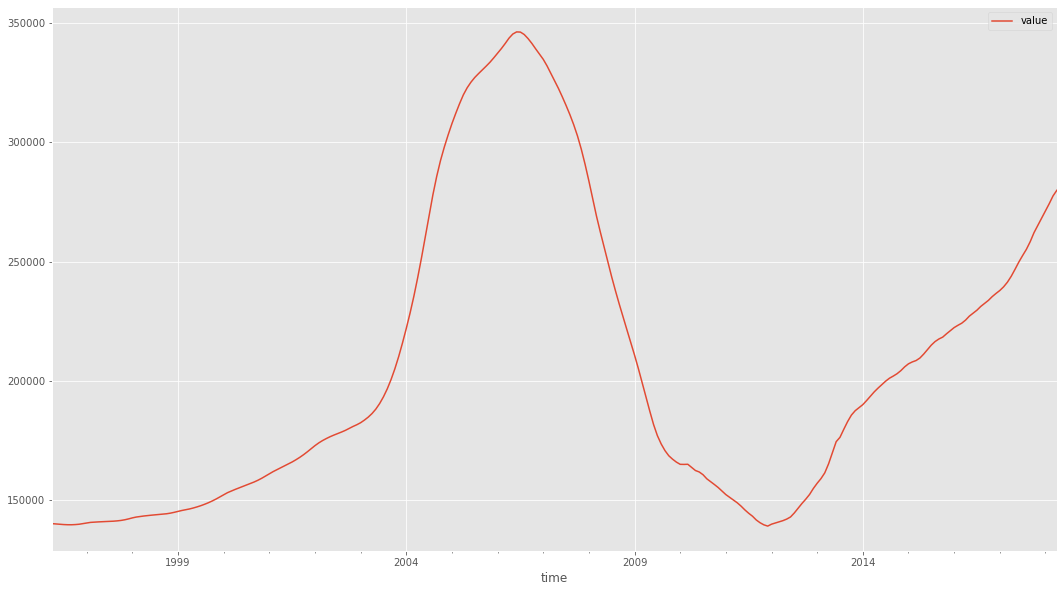

In [9]:
# plotting melted_clark_df
melted_clark_df.plot(figsize=(18,10), subplots=False, legend=True)
plt.show()

The plot above aggregates data from all the zipcodes into a single graph. I want to now look at the general trends for each of the 61 zipcodes in <b>clark_df</b> individually. From the graph below, we see that the pattern for each of the zipcodes is pretty similar. The 2007-2008 mark is when housing prices started to drop significantly. Then, around 2013, the housing prices started to really climb again.

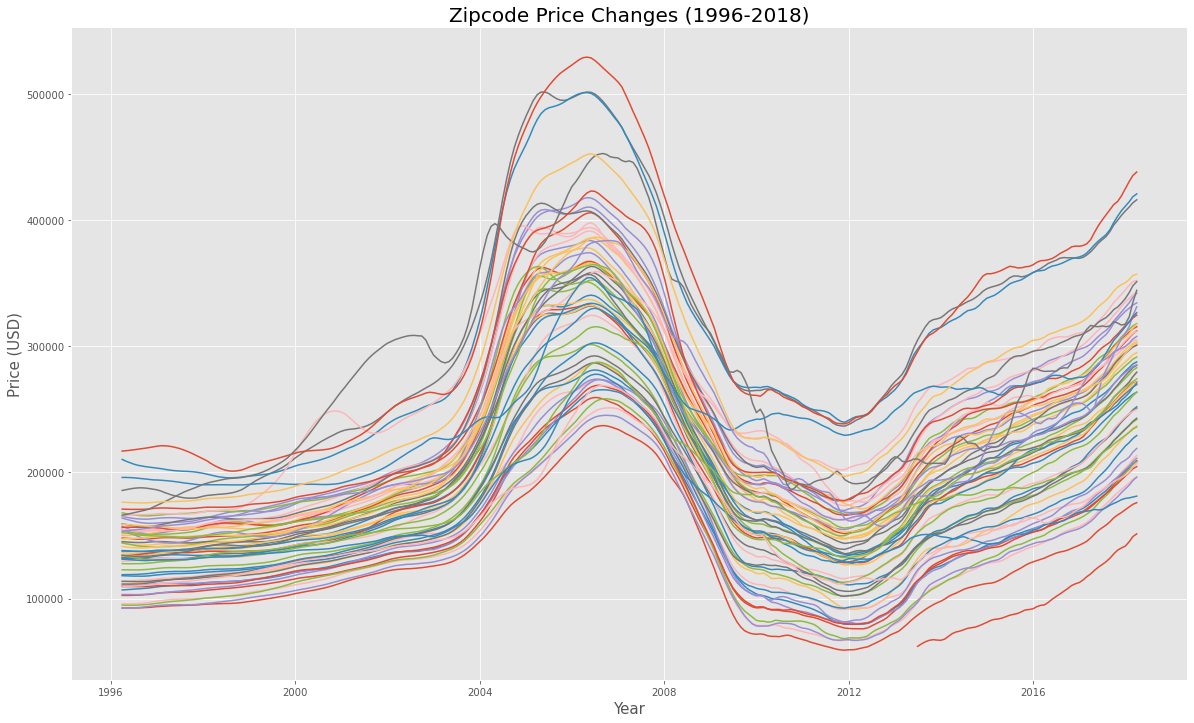

In [10]:
# Code adapted from Sanjit Varma 
# Source: https://github.com/sanjitva/Zillow-TimeSeries-Modeling/blob/main/final_notebook.ipynb

# plotting time series for all zipcodes in clark_df

# extracting zipcodes from clark_df
clark_zips = [a for a in clark_df['RegionName']]

# initialize empty dict
zip_dict = {}

# iterate over every zipcode in clark_zips
# use melt_data helper function to put data in long form
for zipcode in clark_zips:
    zip_dict[zipcode] = melt_data(clark_df[clark_df['RegionName']==zipcode])

# plot time series data
fig, ax = plt.subplots(figsize=(20,12))

for zipcode in zip_dict:
    ax.plot(zip_dict[zipcode],)  

ax.set_title('Zipcode Price Changes (1996-2018)', fontsize=20)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Price (USD)', fontsize=15);

Prior to creating a time series model, I want to look at ROI since 2013. Given that the dataset goes on until 2018, this would be a <b>5-year ROI</b>. I will add a column to the <b>clark_df</b> that stores this calculated <b>5-year ROI</b>. Once I have the <b>5-year ROI</b> column made in the original <b>clark_df</b> dataframe, I will then make a new dataframe called <b>clark_df_filtered</b>, which only houses zipcodes that have an <b>ROI greater than 1.0 (100%)</b>. From there, I will plot the zipcodes in <b>clark_df_filtered</b> with their corresponding ROI values converted to a percentage. 

In [11]:
# creating 5_yr_ROI col in clark_df
clark_df['5_yr_ROI'] = (clark_df['2018-04'] - clark_df['2013-04'])/(clark_df['2013-04'])
clark_df['5_yr_ROI']

<ipython-input-11-5b8a72f7d481>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clark_df['5_yr_ROI'] = (clark_df['2018-04'] - clark_df['2013-04'])/(clark_df['2013-04'])


115      1.097194
173      1.067393
195      0.627022
262      0.469280
309      0.747977
           ...   
12364    0.558061
12407    0.271807
13020    0.722440
14328    0.652904
14722    0.546990
Name: 5_yr_ROI, Length: 61, dtype: float64

In [12]:
# creating filtered clark_df that only includes zipcodes that have 5_yr_ROI greater than 1.0 (100%)
clark_df_filtered = clark_df[clark_df['5_yr_ROI']>=1.0]
clark_df_filtered

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,5_yr_ROI
115,95804,89108,Las Vegas,NV,Las Vegas,Clark,116,102500.0,102500.0,102500.0,...,183300,186600,190200,193400,197300,200700,203500,206600,209300,1.097194
173,95817,89121,Las Vegas,NV,Las Vegas,Clark,174,106800.0,107000.0,107200.0,...,185500,188600,192500,195500,198700,201500,204000,206700,208600,1.067393
433,95806,89110,Las Vegas,NV,Las Vegas,Clark,434,95800.0,95800.0,95800.0,...,174900,177800,181100,183800,186600,189200,191700,194500,196600,1.288708
693,95815,89119,Las Vegas,NV,Las Vegas,Clark,694,111100.0,111400.0,111700.0,...,212100,215100,219000,222300,225800,229100,232200,235000,236900,1.009330
815,95811,89115,Las Vegas,NV,Las Vegas,Clark,816,92500.0,92500.0,92600.0,...,158200,160900,164000,166300,168200,170400,172700,174700,176000,1.227848
1960,95800,89104,Las Vegas,NV,Las Vegas,Clark,1961,94800.0,94700.0,94700.0,...,181500,184600,188500,192500,196300,199500,202500,206000,208500,1.314095
2134,95798,89102,Las Vegas,NV,Las Vegas,Clark,2135,103200.0,103200.0,103200.0,...,194400,197400,201300,204900,207900,209700,212200,216000,219000,1.039106
2934,95803,89107,Las Vegas,NV,Las Vegas,Clark,2935,92300.0,92400.0,92500.0,...,172500,175000,178000,180700,184000,187000,190000,193500,196200,1.221971
3948,95838,89142,Las Vegas,NV,Las Vegas,Clark,3949,109800.0,109800.0,109900.0,...,188300,191100,193900,196300,199200,202300,205100,208400,211200,1.155102
4828,95852,89156,Las Vegas,NV,Las Vegas,Clark,4829,109500.0,109500.0,109500.0,...,183300,185800,188600,191200,194200,197000,199900,202900,204600,1.001957


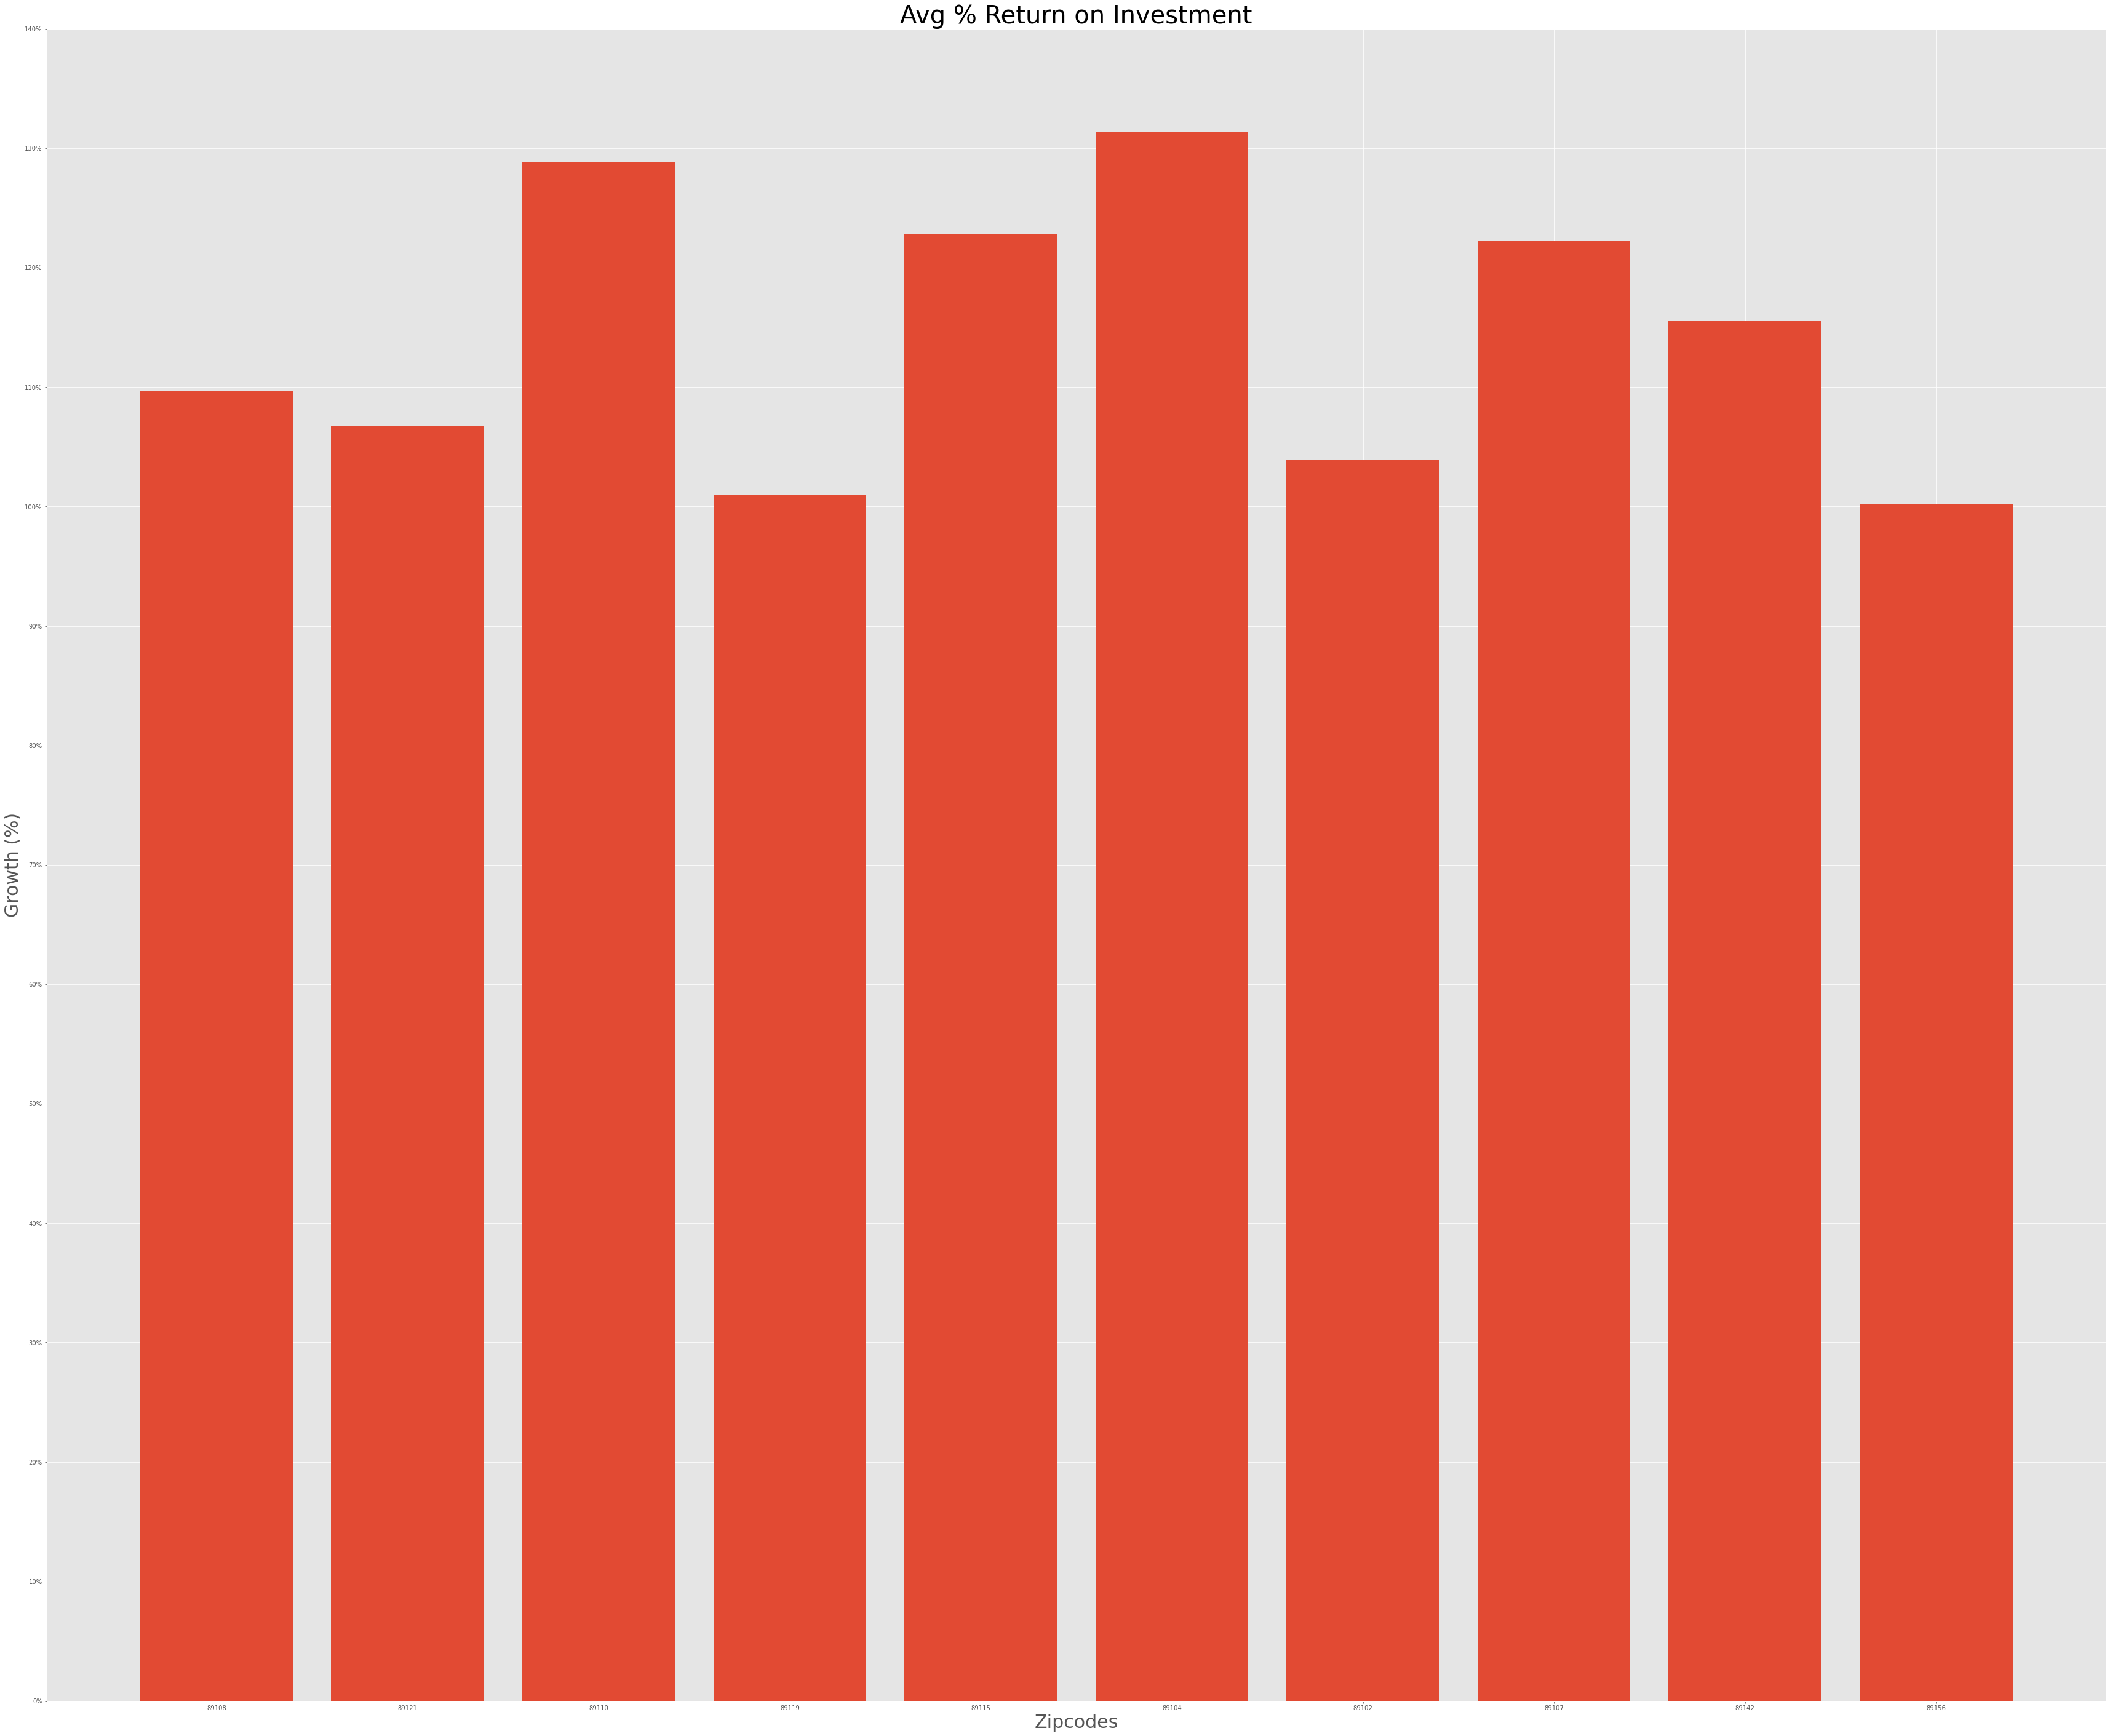

In [13]:
# Code adapted from Sanjit Varma 
# Source: https://github.com/sanjitva/Zillow-TimeSeries-Modeling/blob/main/final_notebook.ipynb

# plotting ROI for each zipcode

fig, ax = plt.subplots(figsize=(60,50))

x_labels = [str(a) for a in clark_df_filtered['RegionName']]
x = list(range(1,11))
y = [a for a in clark_df_filtered['5_yr_ROI']]

ax.bar(x,y)

ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_yticks([a/10 for a in list(range(0,15,1))])
ax.set_yticklabels([str(a*10)+'%' for a in list(range(0,15,1))])
ax.set_ylabel('Growth (%)', fontsize='30')
ax.set_xlabel('Zipcodes', fontsize='30')
ax.set_title('Avg % Return on Investment',fontsize='40');

The zipcode with the greatest ROI is <b>89104</b>, which has an <b>ROI of about 130%</b>. We can utilize the data for this zipcode to create our initial time series model. 

# Data Preparation: 89104 Zipcode

Prior to modeling, we need to prepare our data for the <b>89104</b> zipcode. I will begin by making a new dataframe that houses the 89104 zipcode data. From there, I will employ the <b>melt_data_2()</b> function to convert the dataframe from wide form to long form. The <b>melt_data_2()</b> function is set up exactly like the <b>melt_data()</b> helper function. The only difference is that <b>melt_data_2()</b> factors in the new <b>5_yr_ROI</b> column that was added earlier.

In [14]:
# same as melt_data helper function 
# just added '5_yr_ROI' under id_vars

def melt_data_2(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', '5_yr_ROI'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [15]:
# make new df housing only 89104 zipcode data, then use melt_data to convert to long form
zipcode_89104_data = clark_df_filtered[clark_df_filtered['RegionName']==89104]
tseries_89104 = melt_data_2(zipcode_89104_data)
tseries_89104

,value
time,
1996-04-01,94800.0
1996-05-01,94700.0
1996-06-01,94700.0
1996-07-01,94700.0
1996-08-01,94800.0
...,...
2017-12-01,196300.0
2018-01-01,199500.0
2018-02-01,202500.0


Now that we have the melted <b>tseries_89104</b> data, our next step prior to modeling is checking for <b>seasonality</b> and <b>trends</b>. I plan to build an <b>ARIMA model</b>. Therefore, the assumptions of the <b>ARIMA model</b> are that the time series data is <b>non-seasonal</b> and <b>detrended</b>. If these assumptions are not met, we need to do more data preparation prior to building our model. 

# Seasonality and Trends

To check for trends and seasonality, we need to use methods that allow us to understand a time series' <b>stationarity</b>. In order for the assumptions of <b>non-seasonality</b> and <b>detrending</b> to be met, the data must be deemed <b>non-stationary</b>. Two ways to determine stationarity are <b>rolling statistics</b> and the <b>Dickey-Fuller Test</b>. I plan to use both of these methods on <b>tseries_89104</b>. 

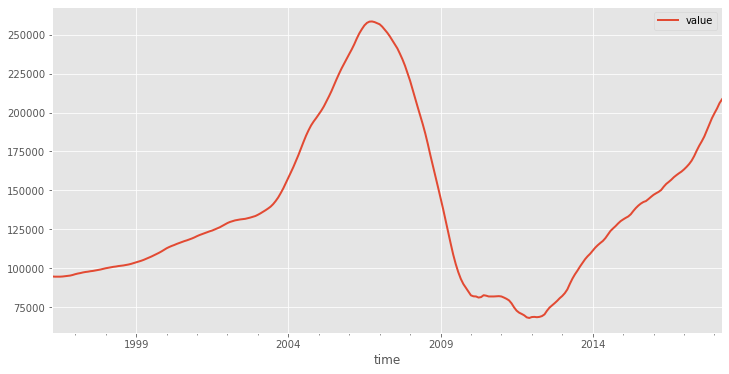

In [16]:
# plotting tseries_89104 to visualize it
tseries_89104.plot(figsize=(12,6), linewidth=2, fontsize=10);

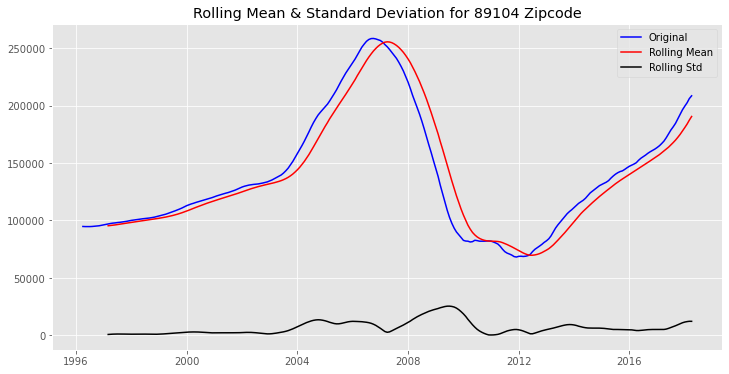

In [17]:
# check rolling statistics

# determine rolling statistics
roll_mean = tseries_89104.rolling(window=12, center=False).mean()
roll_std = tseries_89104.rolling(window=12, center=False).std()

# plot rolling statistics
fig = plt.figure(figsize=(12,6))
plt.plot(tseries_89104, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for 89104 Zipcode')
plt.show()

In [18]:
# perform Dickey-Fuller test
print ('Results of Dickey-Fuller Test: \n')
dftest = adfuller(tseries_89104['value'])

# extract and display test results
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test: 

Test Statistic                  -2.613086
p-value                          0.090323
#Lags Used                      13.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


From our <b>rolling statistics</b> analysis, we see that the <b>rolling mean</b> is <b>not constant over time</b>, thus indicating <b>non-stationarity</b>. This <b>non-stationary</b> behavior is further supported by the <b>Dickey-Fuller Test</b> results, whose test statistic has an insignificant <b>p-value greater than 0.05</b>. This means that the null hypothesis, which states that the <b>time series is non-stationary</b> cannot be rejected. Therefore, more processing of the data must be done before getting into modeling. 

# Removing Seasonality and Trends

There are numerous methods that can be employed to remove seasonality and trends in a time series. The methods I want to use for <b>tseries_89104</b> are <b>subtracting rolling mean</b>, <b>subtracting weighted rolling mean</b>, <b>log transform</b> and <b>square root transform</b>. I will create visualizations for the time series when all four of these strategies are applied. I will also perform the <b>Dickey Fuller Test</b> for these methods to confirm non-seasonality. 

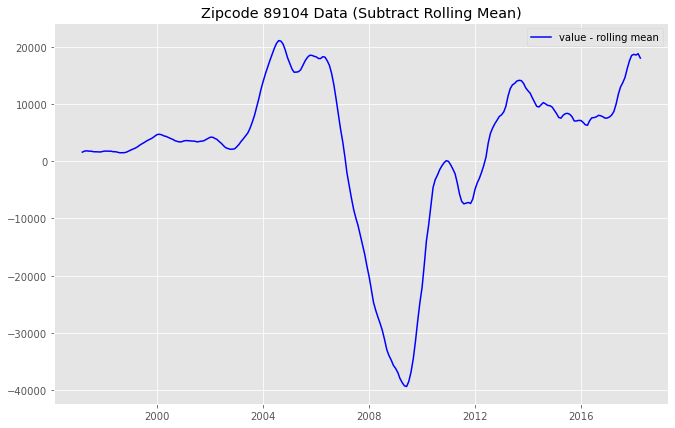

In [19]:
# subtract rolling mean
tseries_89104_minus_roll_mean = tseries_89104 - roll_mean
tseries_89104_minus_roll_mean.dropna(inplace=True)

fig = plt.figure(figsize=(11,7))
plt.plot(tseries_89104_minus_roll_mean, color='blue', label='value - rolling mean')
plt.legend(loc='best')
plt.title('Zipcode 89104 Data (Subtract Rolling Mean)')
plt.show(block=False)

In [20]:
# perform Dickey-Fuller test for rolling mean results
print ('Results of Dickey-Fuller Test: \n')
dftest = adfuller(tseries_89104_minus_roll_mean['value'])

# extract and display test results
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test: 

Test Statistic                  -2.121069
p-value                          0.236128
#Lags Used                      10.000000
Number of Observations Used    243.000000
Critical Value (1%)             -3.457551
Critical Value (5%)             -2.873509
Critical Value (10%)            -2.573148
dtype: float64


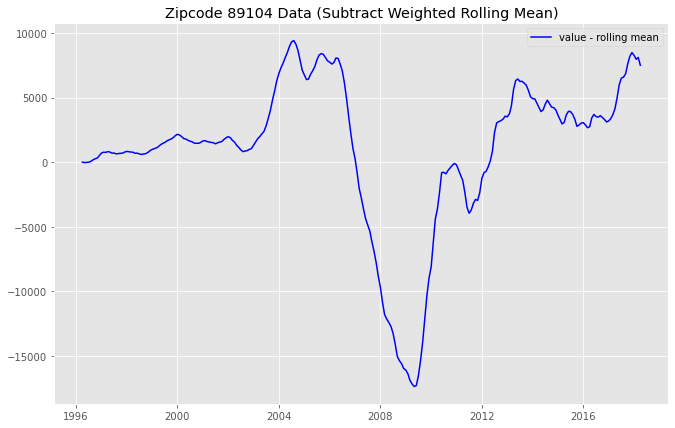

In [21]:
# weighted rolling mean

# use Pandas ewm() to calculate Exponential Weighted Moving Average
exp_roll_mean = tseries_89104.ewm(halflife=2).mean()

# subtract the moving average from the original data
tseries_89104_minus_exp_roll_mean = tseries_89104 - exp_roll_mean

# plot
fig = plt.figure(figsize=(11,7))
plt.plot(tseries_89104_minus_exp_roll_mean, color='blue', label='value - rolling mean')
plt.legend(loc='best')
plt.title('Zipcode 89104 Data (Subtract Weighted Rolling Mean)')
plt.show(block=False)

In [22]:
# perform Dickey-Fuller test for weighted rolling mean results
print ('Results of Dickey-Fuller Test: \n')
dftest = adfuller(tseries_89104_minus_exp_roll_mean['value'])

# extract and display test results
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test: 

Test Statistic                  -2.478920
p-value                          0.120688
#Lags Used                      10.000000
Number of Observations Used    254.000000
Critical Value (1%)             -3.456360
Critical Value (5%)             -2.872987
Critical Value (10%)            -2.572870
dtype: float64


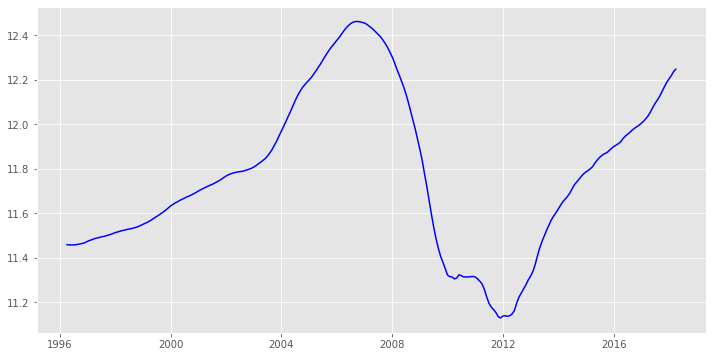

In [23]:
# plot a log transform
tseries_89104_log = np.log(tseries_89104)
fig = plt.figure(figsize=(12,6))
plt.plot(tseries_89104_log, color='blue');

In [24]:
# perform Dickey-Fuller test for log transform results
print ('Results of Dickey-Fuller Test: \n')
dftest = adfuller(tseries_89104_log['value'])

# extract and display test results
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test: 

Test Statistic                  -3.420912
p-value                          0.010266
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


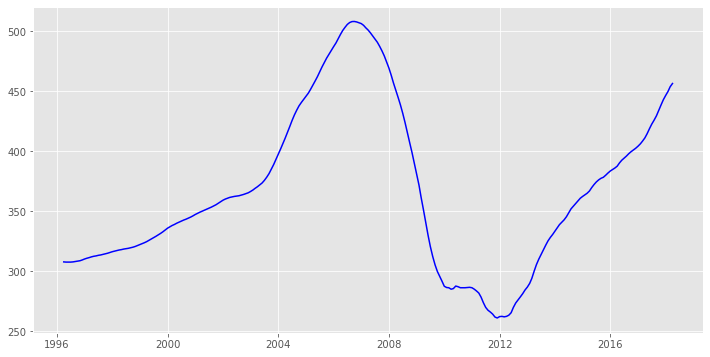

In [25]:
# plot a square root transform
tseries_89104_sqrt = np.sqrt(tseries_89104)
fig = plt.figure(figsize=(12,6))
plt.plot(tseries_89104_sqrt, color='blue');

In [26]:
# perform Dickey-Fuller test for square root transform results
print ('Results of Dickey-Fuller Test: \n')
dftest = adfuller(tseries_89104_sqrt['value'])

# extract and display test results
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test: 

Test Statistic                  -3.250555
p-value                          0.017239
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


After applying all four methods, we see that the best results are yielded by the <b>log transformed</b> and <b>square root transformed</b> time series. The <b>p-values</b> for the <b>Dickey-Fuller Tests</b> for these methods are <b>about 0.01</b>, indicating significance at a threshold of 0.05 and <b>non-seasonality</b>. When <b>subtracting the rolling mean</b> and <b>the weighted rolling mean</b>, the <b>Dickey-Fuller Tests</b> have <b>p-values</b> that are <b>insignificant</b>, being about <b>0.24</b> and <b>0.12</b>, respectively. I will proceed with <b>tseries_89104_log</b> and <b>tseries_89104_sqrt</b> use them for my <b>ARIMA modeling</b>. Based on the model results, I will choose the one that I want to utilize for forecasting. 

# ARIMA Modeling

Now that the data is <b>non-seasonal</b> and <b>detrended</b>, we can begin the iterative modeling process. Remember, we're using <b>tseries_89104_log</b> and <b>tseries_89104_sqrt</b>. Let's go ahead and split <b>tseries_89104_log</b> and <b>tseries_89104_sqrt</b> into training and test sets. The training sets will house data from April 2011 to April 2016, while the test sets will be information from May 2016 to April 2018, which is where the dataset ends.

In [27]:
# split tseries_89104_log and tseries_89104_sqrt into training and test sets
tseries_89104_log_train = tseries_89104_log['2011-04':'2016-04'] 
tseries_89104_log_test = tseries_89104_log['2016-05':] 
tseries_89104_sqrt_train = tseries_89104_sqrt['2011-04':'2016-04']
tseries_89104_sqrt_test = tseries_89104_sqrt['2016-05':]

Let's now turn our attention to creating our models, which we will fit on <b>tseries_89104_log_train</b> and <b>tseries_89104_sqrt_train</b>. An <b>ARIMA model</b> can be fit on time series data to predict future points. The parameters for ARIMA are specified as <b>(p,d,q)</b>, where p is the autoregressive part of the model, d is the integrated component, and q is the moving average portion of the model. (p,d,q) represents the model's <b>order</b>. In order to find the <b>optimal parameters</b> for (p,d,q), a <b>grid search method</b> can be employed. 

In [28]:
# Setting up grid search

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# ARIMA Modeling: tseries_89104_log_train

In [29]:
# Run a grid with pdq and seasonal pdq parameters and get the best AIC value
# For tseries_89104_log_train
ans_log = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(tseries_89104_log_train,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans_log.append([comb, combs, output.aic])
            print('ARIMA {} x {}: AIC Calculated={}'.format(comb, combs, output.aic))
        except:
            continue

C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 0) x (0, 0, 0, 12): AIC Calculated=465.6740957912921
ARIMA (0, 0, 0) x (0, 0, 1, 12): AIC Calculated=375.63101881689266
ARIMA (0, 0, 0) x (0, 1, 0, 12): AIC Calculated=-15.475333288002588


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 0) x (0, 1, 1, 12): AIC Calculated=-1.9791385960293972
ARIMA (0, 0, 0) x (1, 0, 0, 12): AIC Calculated=-77.13731946132542


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 0) x (1, 0, 1, 12): AIC Calculated=-99.55689694163507
ARIMA (0, 0, 0) x (1, 1, 0, 12): AIC Calculated=-30.54762408585289


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 0) x (1, 1, 1, 12): AIC Calculated=-36.23342841352504
ARIMA (0, 0, 1) x (0, 0, 0, 12): AIC Calculated=383.2968570065737


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1) x (0, 0, 1, 12): AIC Calculated=309.6584215189858
ARIMA (0, 0, 1) x (0, 1, 0, 12): AIC Calculated=-74.50659124998545


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1) x (0, 1, 1, 12): AIC Calculated=-48.46291801051608


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1) x (1, 0, 0, 12): AIC Calculated=-134.08124704746646


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1) x (1, 0, 1, 12): AIC Calculated=-157.9838132058298


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1) x (1, 1, 0, 12): AIC Calculated=-73.32698556436013


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1) x (1, 1, 1, 12): AIC Calculated=-85.33605216793867
ARIMA (0, 1, 0) x (0, 0, 0, 12): AIC Calculated=-305.0437339540183


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 0) x (0, 0, 1, 12): AIC Calculated=-262.8632530339716
ARIMA (0, 1, 0) x (0, 1, 0, 12): AIC Calculated=-231.54631071212242


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 0) x (0, 1, 1, 12): AIC Calculated=1384.6728043525472
ARIMA (0, 1, 0) x (1, 0, 0, 12): AIC Calculated=-253.46121641871616


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 0) x (1, 0, 1, 12): AIC Calculated=-260.98390460207173
ARIMA (0, 1, 0) x (1, 1, 0, 12): AIC Calculated=-223.14156164371758

C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 0) x (1, 1, 1, 12): AIC Calculated=1356.9826508347387
ARIMA (0, 1, 1) x (0, 0, 0, 12): AIC Calculated=-367.49122939745075


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 1) x (0, 0, 1, 12): AIC Calculated=-303.8723911664402
ARIMA (0, 1, 1) x (0, 1, 0, 12): AIC Calculated=-267.3200162772848


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 1) x (0, 1, 1, 12): AIC Calculated=1231.8561100536633


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 1) x (1, 0, 0, 12): AIC Calculated=-302.63016795990296


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 1) x (1, 0, 1, 12): AIC Calculated=-301.8933985229134


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 1) x (1, 1, 0, 12): AIC Calculated=-249.54421808218584


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 1) x (1, 1, 1, 12): AIC Calculated=1250.2339267010889
ARIMA (1, 0, 0) x (0, 0, 0, 12): AIC Calculated=-333.2408958989577


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 0) x (0, 0, 1, 12): AIC Calculated=-291.4578550143943
ARIMA (1, 0, 0) x (0, 1, 0, 12): AIC Calculated=-233.35909281874626


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 0) x (0, 1, 1, 12): AIC Calculated=-224.49012739651923


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 0) x (1, 0, 0, 12): AIC Calculated=-250.48504744791433


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 0) x (1, 0, 1, 12): AIC Calculated=-250.59873712947967


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 0) x (1, 1, 0, 12): AIC Calculated=-226.5747765559485


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 0) x (1, 1, 1, 12): AIC Calculated=-236.70984431781514
ARIMA (1, 0, 1) x (0, 0, 0, 12): AIC Calculated=-388.6253795557935

C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1) x (0, 0, 1, 12): AIC Calculated=-325.55054036574376


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1) x (0, 1, 0, 12): AIC Calculated=-277.839253572694


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1) x (0, 1, 1, 12): AIC Calculated=-242.44987386574746


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1) x (1, 0, 0, 12): AIC Calculated=-293.02185085319184


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1) x (1, 0, 1, 12): AIC Calculated=-288.3414638028016


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1) x (1, 1, 0, 12): AIC Calculated=-249.38667214283464


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1) x (1, 1, 1, 12): AIC Calculated=-273.2539179881054
ARIMA (1, 1, 0) x (0, 0, 0, 12): AIC Calculated=-441.0148932386641


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 0) x (0, 0, 1, 12): AIC Calculated=-366.30324634055836
ARIMA (1, 1, 0) x (0, 1, 0, 12): AIC Calculated=-311.02275216851905

C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 0) x (0, 1, 1, 12): AIC Calculated=1308.3366580905358


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 0) x (1, 0, 0, 12): AIC Calculated=-366.5974338921517
ARIMA (1, 1, 0) x (1, 0, 1, 12): AIC Calculated=-344.7729691327329


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 0) x (1, 1, 0, 12): AIC Calculated=-282.3657530904479


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 0) x (1, 1, 1, 12): AIC Calculated=1324.195702401946
ARIMA (1, 1, 1) x (0, 0, 0, 12): AIC Calculated=-442.87345037622543


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1) x (0, 0, 1, 12): AIC Calculated=-362.5607915577509


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1) x (0, 1, 0, 12): AIC Calculated=-319.9958797324734


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1) x (0, 1, 1, 12): AIC Calculated=1340.7233160015992


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1) x (1, 0, 0, 12): AIC Calculated=-367.89935452841587


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1) x (1, 0, 1, 12): AIC Calculated=-361.43618681025816


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1) x (1, 1, 0, 12): AIC Calculated=-276.6864213262576


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1) x (1, 1, 1, 12): AIC Calculated=1356.1863871178348


In [30]:
# Find the parameters with minimal AIC value for tseries_89104_log_train
ans_df_log = pd.DataFrame(ans_log, columns=['pdq', 'pdqs', 'aic'])
ans_df_log.loc[ans_df_log['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (0, 0, 0, 12)
aic          -442.873
Name: 56, dtype: object

Based on the numbers for <b>pdq</b> and <b>pdqs</b> selected by our grid search, we can now plug in these optimal value combinations for our <b>order</b> and <b>seasonal_order</b> parameters. Let's run the model again and look at our results. We will also look at different visualizations using the <b>.plot_diagnostics()</b> method. 

In [31]:
# Plug the optimal parameter values into a new SARIMAX model
# For tseries_89104_log_train
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(tseries_89104_log_train, 
                                        order=(1, 1, 1), 
                                        seasonal_order=(0, 0, 0, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output_log = ARIMA_MODEL.fit()

print(output_log.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8949      0.055     16.248      0.000       0.787       1.003
ma.L1          0.3850      0.126      3.050      0.002       0.138       0.632
sigma2      2.546e-05   3.65e-06      6.967      0.000    1.83e-05    3.26e-05


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


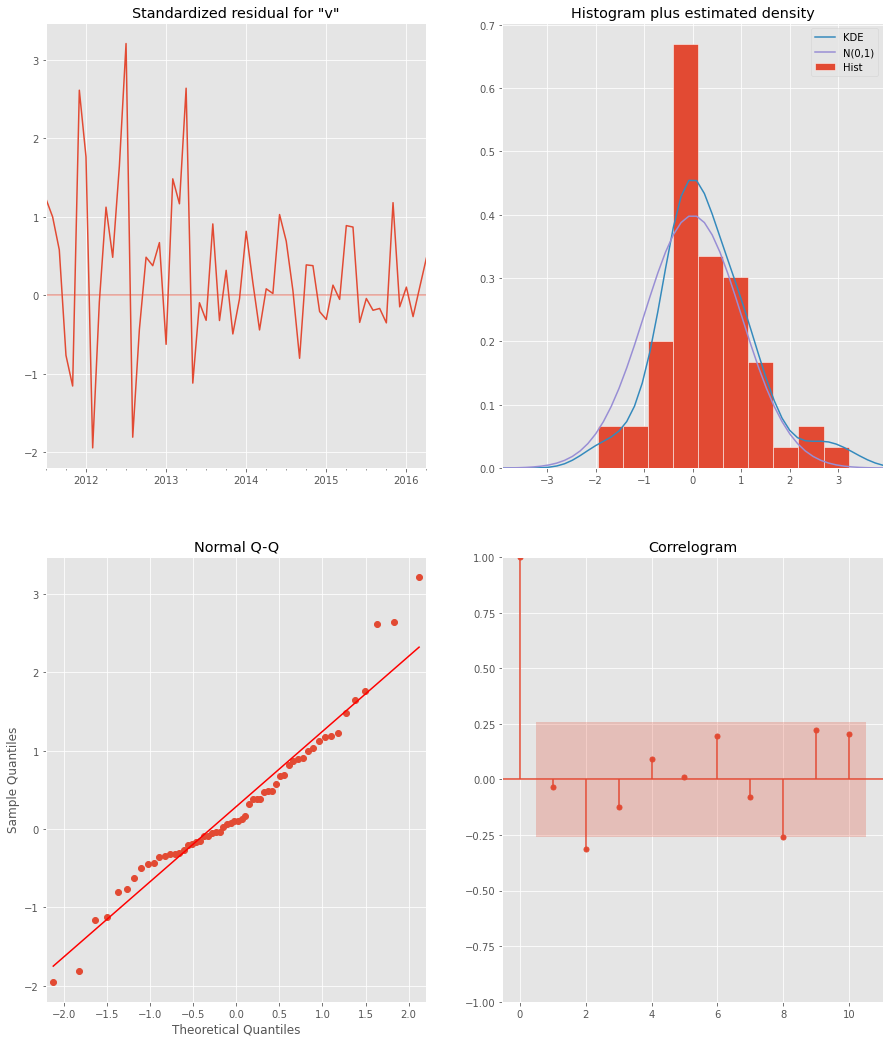

In [32]:
# Call plot_diagnostics() on tseries_89104_log_train
output_log.plot_diagnostics(figsize=(15, 18))
plt.show()

From the ARIMA model summary, we see that all coefficients are significant. From the visualizations generated by <b>.plot_diagnostics()</b>, we notice that the <b>KDE follows a relatively normal distribution</b> and matches up closely with the N(0,1) standard normal distribution curve. Though some of the points fall off the red guidance line, the <b>qq-plot</b> has dots that show a relatively linear trend. This indicates that the residuals are normally distributed. The top left plot shows no obvious seasonality; this is further supported by the <b>correlogram</b> on the bottom right, which tells us that the residuals in the time series have low correlations with the lagged versions of itself. 

# ARIMA Modeling: tseries_89104_sqrt_train

Similar to what we did with <b>tseries_89104_log_train</b>, we will find the optimal parameters for pdq and seasonal pdq for <b>tseries_89104_sqrt_train</b> and fit an optimized ARIMA model on it. 

In [33]:
# Run a grid with pdq and seasonal pdq parameters and get the best AIC value
# For tseries_89104_sqrt_train
ans_sqrt = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(tseries_89104_sqrt_train,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans_sqrt.append([comb, combs, output.aic])
            print('ARIMA {} x {}: AIC Calculated={}'.format(comb, combs, output.aic))
        except:
            continue

C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 0) x (0, 0, 0, 12): AIC Calculated=866.1782131722584


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 0) x (0, 0, 1, 12): AIC Calculated=699.3386140740673
ARIMA (0, 0, 0) x (0, 1, 0, 12): AIC Calculated=469.68258208727826


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 0) x (0, 1, 1, 12): AIC Calculated=361.0121187233148
ARIMA (0, 0, 0) x (1, 0, 0, 12): AIC Calculated=413.91363766960404


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 0) x (1, 0, 1, 12): AIC Calculated=383.68353419911614
ARIMA (0, 0, 0) x (1, 1, 0, 12): AIC Calculated=339.25316091838107


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 0) x (1, 1, 1, 12): AIC Calculated=324.5402585283098
ARIMA (0, 0, 1) x (0, 0, 0, 12): AIC Calculated=777.3263881718567


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1) x (0, 0, 1, 12): AIC Calculated=688.579791935382
ARIMA (0, 0, 1) x (0, 1, 0, 12): AIC Calculated=400.65504393318724


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1) x (0, 1, 1, 12): AIC Calculated=326.1797466835515


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1) x (1, 0, 0, 12): AIC Calculated=356.6372117625511


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1) x (1, 0, 1, 12): AIC Calculated=389.9222333971385


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1) x (1, 1, 0, 12): AIC Calculated=296.3067887117114


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1) x (1, 1, 1, 12): AIC Calculated=266.44326151395063
ARIMA (0, 1, 0) x (0, 0, 0, 12): AIC Calculated=288.5172894045663
ARIMA (0, 1, 0) x (0, 0, 1, 12): AIC Calculated=210.47152121697704
ARIMA (0, 1, 0) x (0, 1, 0, 12): AIC Calculated=232.98846367042296


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: Valu

ARIMA (0, 1, 0) x (0, 1, 1, 12): AIC Calculated=1045.8344897132865
ARIMA (0, 1, 0) x (1, 0, 0, 12): AIC Calculated=226.0011516917707
ARIMA (0, 1, 0) x (1, 0, 1, 12): AIC Calculated=211.25940586624628

C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



ARIMA (0, 1, 0) x (1, 1, 0, 12): AIC Calculated=136.86818212969328


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 0) x (1, 1, 1, 12): AIC Calculated=1349.5674738648534
ARIMA (0, 1, 1) x (0, 0, 0, 12): AIC Calculated=216.7052316629941


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 1) x (0, 0, 1, 12): AIC Calculated=159.3298288204526
ARIMA (0, 1, 1) x (0, 1, 0, 12): AIC Calculated=176.44800662286025


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 1) x (0, 1, 1, 12): AIC Calculated=902.315400994845
ARIMA (0, 1, 1) x (1, 0, 0, 12): AIC Calculated=177.6466564024281


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 1) x (1, 0, 1, 12): AIC Calculated=161.1224604596157


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 1) x (1, 1, 0, 12): AIC Calculated=105.6431432158442


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 1) x (1, 1, 1, 12): AIC Calculated=1417.9764549313832
ARIMA (1, 0, 0) x (0, 0, 0, 12): AIC Calculated=261.6961994238993


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 0) x (0, 0, 1, 12): AIC Calculated=168.61093501086236
ARIMA (1, 0, 0) x (0, 1, 0, 12): AIC Calculated=241.16919350360268


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 0) x (0, 1, 1, 12): AIC Calculated=136.77951276765694
ARIMA (1, 0, 0) x (1, 0, 0, 12): AIC Calculated=233.61866133327706


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 0) x (1, 0, 1, 12): AIC Calculated=235.42983944540697


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 0) x (1, 1, 0, 12): AIC Calculated=135.71758726173917


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 0) x (1, 1, 1, 12): AIC Calculated=137.50572018087908
ARIMA (1, 0, 1) x (0, 0, 0, 12): AIC Calculated=197.24270402483384


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1) x (0, 0, 1, 12): AIC Calculated=128.10915279096434
ARIMA (1, 0, 1) x (0, 1, 0, 12): AIC Calculated=187.72564444121264


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1) x (0, 1, 1, 12): AIC Calculated=96.4420000947145
ARIMA (1, 0, 1) x (1, 0, 0, 12): AIC Calculated=189.5081863600313


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1) x (1, 0, 1, 12): AIC Calculated=186.7864602975656


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1) x (1, 1, 0, 12): AIC Calculated=104.44650938577203


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1) x (1, 1, 1, 12): AIC Calculated=80.95639122929892
ARIMA (1, 1, 0) x (0, 0, 0, 12): AIC Calculated=144.46430057174945


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 0) x (0, 0, 1, 12): AIC Calculated=104.5578326391923
ARIMA (1, 1, 0) x (0, 1, 0, 12): AIC Calculated=154.88719278139757


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 0) x (0, 1, 1, 12): AIC Calculated=969.3346450752354


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 0) x (1, 0, 0, 12): AIC Calculated=104.36293522002214


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 0) x (1, 0, 1, 12): AIC Calculated=105.19195372227286
ARIMA (1, 1, 0) x (1, 1, 0, 12): AIC Calculated=68.0894596978643

C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



ARIMA (1, 1, 0) x (1, 1, 1, 12): AIC Calculated=1039.9239357967779
ARIMA (1, 1, 1) x (0, 0, 0, 12): AIC Calculated=133.26987196022958


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: Valu

ARIMA (1, 1, 1) x (0, 0, 1, 12): AIC Calculated=98.85960772000027
ARIMA (1, 1, 1) x (0, 1, 0, 12): AIC Calculated=136.71427744906222


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1) x (0, 1, 1, 12): AIC Calculated=1308.3385639826033
ARIMA (1, 1, 1) x (1, 0, 0, 12): AIC Calculated=102.81335806191557


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1) x (1, 0, 1, 12): AIC Calculated=99.77053369678902
ARIMA (1, 1, 1) x (1, 1, 0, 12): AIC Calculated=73.15483124110241


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1) x (1, 1, 1, 12): AIC Calculated=1376.2442373496344


In [34]:
# Find the parameters with minimal AIC value for tseries_89104_sqrt_train
ans_df_sqrt = pd.DataFrame(ans_sqrt, columns=['pdq', 'pdqs', 'aic'])
ans_df_sqrt.loc[ans_df_sqrt['aic'].idxmin()]

pdq         (1, 1, 0)
pdqs    (1, 1, 0, 12)
aic           68.0895
Name: 54, dtype: object

Let's run the ARIMA model again with the grid search-selected parameters and look at our results. We will print out the model table summary and employ <b>plot_diagnostics()</b>, similar to what we did with the log times series. 

In [35]:
# Plug the optimal parameter values into a new SARIMAX model
# For tseries_89104_sqrt_train
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(tseries_89104_sqrt_train, 
                                        order=(1, 1, 0), 
                                        seasonal_order=(1, 1, 0, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output_sqrt = ARIMA_MODEL.fit()

print(output_sqrt.summary().tables[1])

C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8318      0.046     18.132      0.000       0.742       0.922
ar.S.L12      -0.5494      0.086     -6.408      0.000      -0.717      -0.381
sigma2         0.3451      0.114      3.028      0.002       0.122       0.568


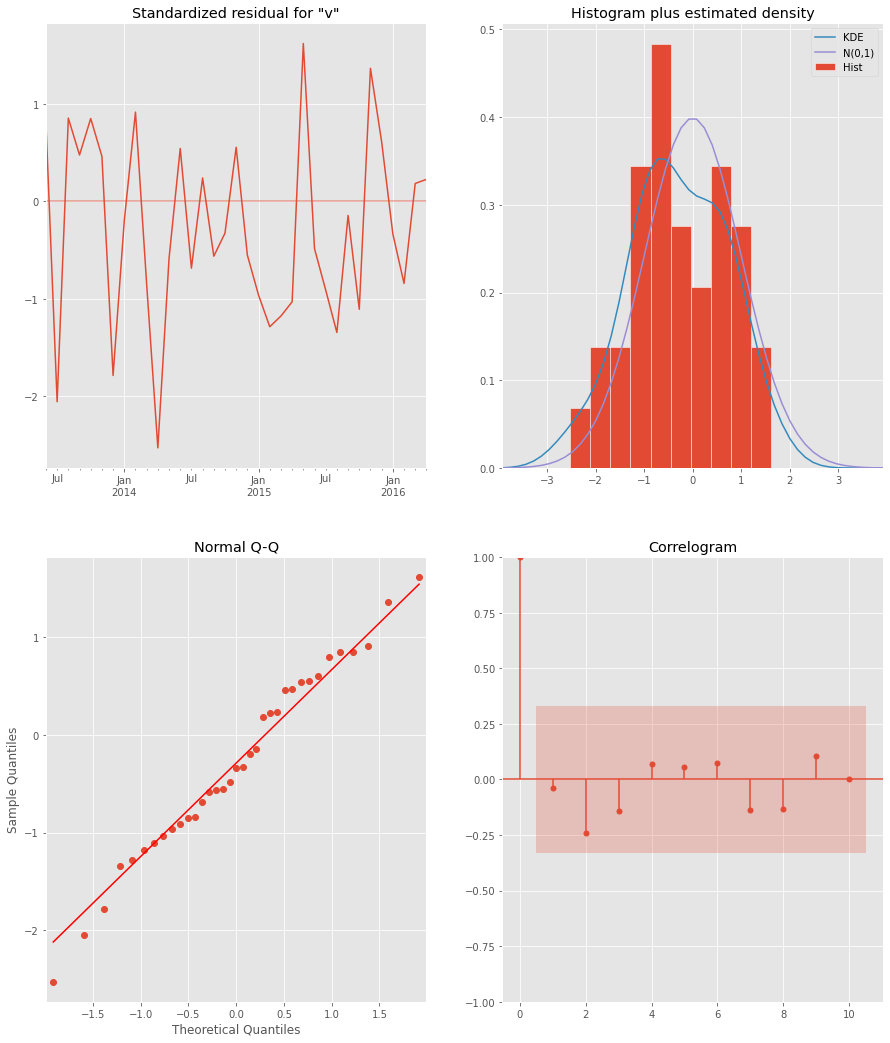

In [36]:
# Call plot_diagnostics() on tseries_89104_sqrt_train
output_sqrt.plot_diagnostics(figsize=(15, 18))
plt.show()

From the ARIMA model summary, we see that all of the coefficients are significant. From the visualizations generated by <b>.plot_diagnostics()</b>, we notice that the <b>KDE follows a relatively normal distribution</b> and matches up well with the N(0,1) curve; however, there is a slight concave portion at the top. While some of the points fall off the red guidance line in the <b>qq-plot</b>, the blue dots still show a relatively linear trend. This indicates that the residuals are normally distributed. The top left plot shows no obvious seasonality; this is also supported by the <b>correlogram</b>, which tells us that the residuals in the time series have low correlations with the lagged versions of itself. 

# ARIMA Modeling: tseries_89104

Earlier, we said that the original <b>tseries_89104</b> data exhibited some seasonality based on the Dickey-Fuller test results, which yielded an insignificant p-value of <b>about 0.09</b>. However, for comparison purposes, let's also create an ARIMA model for the raw <b>tseries_89104</b> time series. Similar to the modeling done for the previous two time series, <b>tseries_89104_log_train</b> and <b>tseries_89104_sqrt_train</b>, we will use a grid search to determine the optimal parameters. It should also be noted that we will fit the model on <b>tseries_89104_train</b>, which houses data between April 2011 and April 2016. The test set will be data from May 2016 to April 2018, just like how we set it up for the log transformed and square root transformed data.

In [37]:
# split tseries_89104 into training and test set
tseries_89104_train = tseries_89104['2011-04':'2016-04']
tseries_89104_test = tseries_89104['2016-05':]

In [38]:
# Run a grid with pdq and seasonal pdq parameters and get the best AIC value
# For tseries_89104_train
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(tseries_89104_train,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}: AIC Calculated={}'.format(comb, combs, output.aic))
        except:
            continue

C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 0) x (0, 0, 0, 12): AIC Calculated=1564.2778975921672
ARIMA (0, 0, 0) x (0, 0, 1, 12): AIC Calculated=1240.0868285194665


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 0) x (0, 1, 0, 12): AIC Calculated=1090.5622226632343
ARIMA (0, 0, 0) x (0, 1, 1, 12): AIC Calculated=826.954430779297
ARIMA (0, 0, 0) x (1, 0, 0, 12): AIC Calculated=1043.0307259861386
ARIMA (0, 0, 0) x (1, 0, 1, 12): AIC Calculated=1063.2294432922931

C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



ARIMA (0, 0, 0) x (1, 1, 0, 12): AIC Calculated=812.092658437311


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 0) x (1, 1, 1, 12): AIC Calculated=787.8667230896622
ARIMA (0, 0, 1) x (0, 0, 0, 12): AIC Calculated=1499.1885987939131


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1) x (0, 0, 1, 12): AIC Calculated=55869.53533987547
ARIMA (0, 0, 1) x (0, 1, 0, 12): AIC Calculated=1076.555782533899


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1) x (0, 1, 1, 12): AIC Calculated=769.1310713301247
ARIMA (0, 0, 1) x (1, 0, 0, 12): AIC Calculated=1234.507839578782


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1) x (1, 0, 1, 12): AIC Calculated=1186.1983640334727
ARIMA (0, 0, 1) x (1, 1, 0, 12): AIC Calculated=813.1995312698722


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1) x (1, 1, 1, 12): AIC Calculated=768.7497205482622
ARIMA (0, 1, 0) x (0, 0, 0, 12): AIC Calculated=1048.3880155478075
ARIMA (0, 1, 0) x (0, 0, 1, 12): AIC Calculated=822.1359505003879
ARIMA (0, 1, 0) x (0, 1, 0, 12): AIC Calculated=828.7737712656833


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: Valu

ARIMA (0, 1, 0) x (0, 1, 1, 12): AIC Calculated=1582.0234505089459
ARIMA (0, 1, 0) x (1, 0, 0, 12): AIC Calculated=839.1377263059767


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 0) x (1, 0, 1, 12): AIC Calculated=818.3980310796443
ARIMA (0, 1, 0) x (1, 1, 0, 12): AIC Calculated=598.0527155497272


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 0) x (1, 1, 1, 12): AIC Calculated=1494.4120997210218
ARIMA (0, 1, 1) x (0, 0, 0, 12): AIC Calculated=964.2475944712274


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 1) x (0, 0, 1, 12): AIC Calculated=756.1883892950441
ARIMA (0, 1, 1) x (0, 1, 0, 12): AIC Calculated=789.7619566000355


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 1) x (0, 1, 1, 12): AIC Calculated=2684.852542514806
ARIMA (0, 1, 1) x (1, 0, 0, 12): AIC Calculated=821.747478968414


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 1) x (1, 0, 1, 12): AIC Calculated=750.4186951956298


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 1) x (1, 1, 0, 12): AIC Calculated=567.300487299936


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 1) x (1, 1, 1, 12): AIC Calculated=814.7676821953121
ARIMA (1, 0, 0) x (0, 0, 0, 12): AIC Calculated=1024.0440049566723


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 0) x (0, 0, 1, 12): AIC Calculated=797.5165712240914
ARIMA (1, 0, 0) x (0, 1, 0, 12): AIC Calculated=849.6024716437266


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 0) x (0, 1, 1, 12): AIC Calculated=599.690112424603
ARIMA (1, 0, 0) x (1, 0, 0, 12): AIC Calculated=863.2523281392574


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 0) x (1, 0, 1, 12): AIC Calculated=795.6607473414876
ARIMA (1, 0, 0) x (1, 1, 0, 12): AIC Calculated=615.5768308981396


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 0) x (1, 1, 1, 12): AIC Calculated=588.8641821524039
ARIMA (1, 0, 1) x (0, 0, 0, 12): AIC Calculated=956.4612852100042


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1) x (0, 0, 1, 12): AIC Calculated=750.5270209548


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1) x (0, 1, 0, 12): AIC Calculated=809.9828768510538


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1) x (0, 1, 1, 12): AIC Calculated=551.8240780740945


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1) x (1, 0, 0, 12): AIC Calculated=853.7379740882541


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1) x (1, 0, 1, 12): AIC Calculated=751.1411877317278


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1) x (1, 1, 0, 12): AIC Calculated=568.9971650719676


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1) x (1, 1, 1, 12): AIC Calculated=544.8225341880878
ARIMA (1, 1, 0) x (0, 0, 0, 12): AIC Calculated=896.6469086704927
ARIMA (1, 1, 0) x (0, 0, 1, 12): AIC Calculated=709.7755969254758


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: Valu

ARIMA (1, 1, 0) x (0, 1, 0, 12): AIC Calculated=753.0501504585654


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 0) x (0, 1, 1, 12): AIC Calculated=1499.6390880038916
ARIMA (1, 1, 0) x (1, 0, 0, 12): AIC Calculated=708.5287561809987


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 0) x (1, 0, 1, 12): AIC Calculated=709.6804100841304


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 0) x (1, 1, 0, 12): AIC Calculated=519.0300083120849


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 0) x (1, 1, 1, 12): AIC Calculated=1565.515752491247
ARIMA (1, 1, 1) x (0, 0, 0, 12): AIC Calculated=873.2825975664609


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1) x (0, 0, 1, 12): AIC Calculated=691.3482810091917
ARIMA (1, 1, 1) x (0, 1, 0, 12): AIC Calculated=732.2514990571633


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1) x (0, 1, 1, 12): AIC Calculated=1210.6182629265063
ARIMA (1, 1, 1) x (1, 0, 0, 12): AIC Calculated=707.3897910710255


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1) x (1, 0, 1, 12): AIC Calculated=689.1296850312128


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1) x (1, 1, 0, 12): AIC Calculated=519.2817762828217


C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1) x (1, 1, 1, 12): AIC Calculated=1329.0118052197984


In [39]:
# Find the parameters with minimal AIC value for tseries_89104_train
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 0)
pdqs    (1, 1, 0, 12)
aic            519.03
Name: 54, dtype: object

In [40]:
# Plug the optimal parameter values into a new SARIMAX model 
# For tseries_89104_train
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(tseries_89104_train, 
                                        order=(1, 1, 0), 
                                        seasonal_order=(1, 1, 0, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8381      0.048     17.461      0.000       0.744       0.932
ar.S.L12      -0.5862      0.094     -6.250      0.000      -0.770      -0.402
sigma2       1.36e+05   4.77e+04      2.847      0.004    4.24e+04     2.3e+05


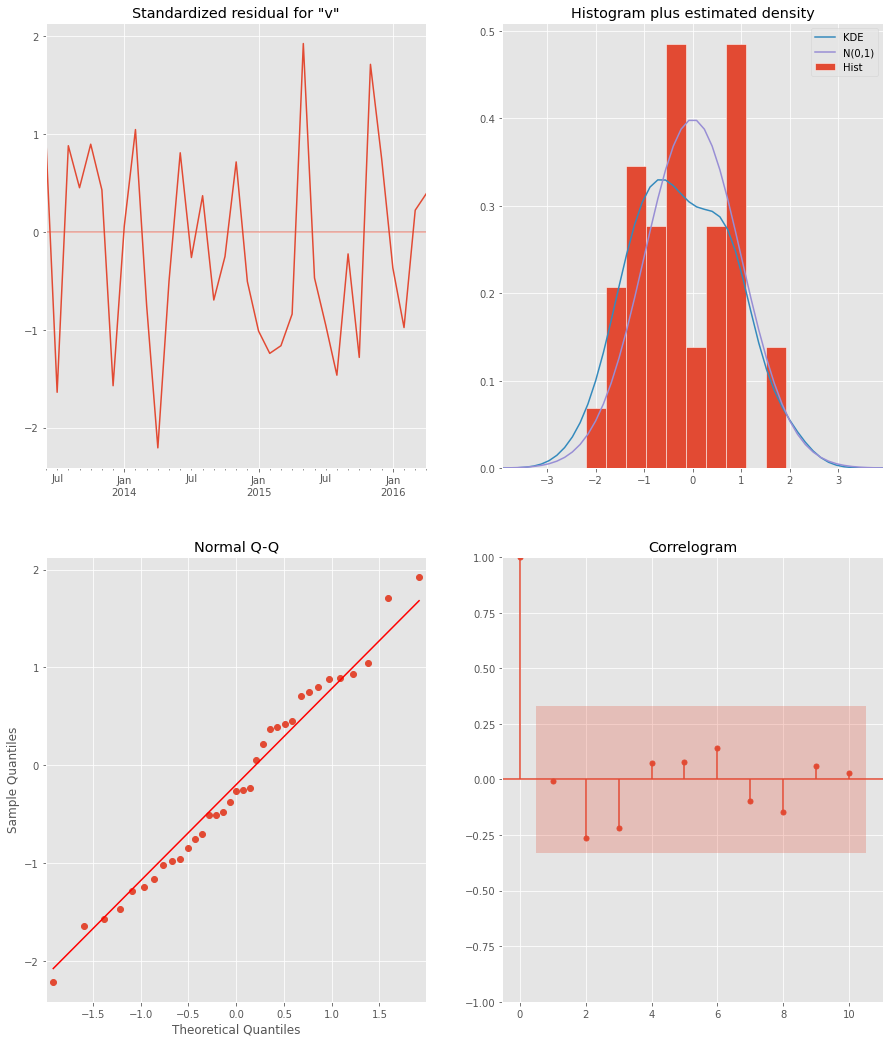

In [41]:
# Call plot_diagnostics() on tseries_89104_train
output.plot_diagnostics(figsize=(15, 18))
plt.show()

From the ARIMA model summary, we see that all of the coefficients are significant. From the visualizations generated by <b>.plot_diagnostics()</b>, we notice that the <b>KDE follows a relatively normal distribution</b> and matches up closely with the N(0,1) curve. While some of the points fall off the red guidance line in the <b>qq-plot</b>, the blue dots still show a relatively linear trend, indicating that the residuals are normally distributed. The top left plot shows no obvious seasonality; this is also supported by the <b>correlogram</b>, which tells us that the residuals in the time series have low correlations with the lagged versions of itself. 

# Choosing Model

Between the three ARIMA models for <b>tseries_89104_log_train</b>, <b>tseries_89104_sqrt_train</b>, and <b>tseries_89104_train</b>, I will proceed with the model for <b>tseries_89104_train</b>.

# Validating Model 

Now that we've deemed the fit of the model to be satisfactory, we can validate the chosen model using predicted values to compare to real values in the time series. This will give us insight on the accuracy of our forecasts. I will employ the <b>get_prediction()</b> and <b>conf_int()</b> methods to achieve this model validation. In terms of forecasting, I will use <b>one-step ahead forecasting</b>. The metric I will utilize to determine the accuracy of the forecasts will be <b>MSE</b>. 

# One-Step Ahead Forecasting

In [42]:
# Get predictions starting from 2016-05 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2016-05'), end=pd.to_datetime('2018-04'), dynamic=False)
pred_conf = pred.conf_int()
pred_conf

,lower value,upper value
2016-05-01,151040.721161,152486.060540
2016-06-01,151952.124652,154976.468525
2016-07-01,152978.478120,157735.414601
2016-08-01,153862.710778,160426.356382
2016-09-01,154215.633859,162611.564160
2016-10-01,154360.287360,164583.567738
2016-11-01,154935.204749,166961.503778
2016-12-01,155461.925994,169254.696417
2017-01-01,155742.645400,171257.905631
2017-02-01,155871.306810,173060.880939


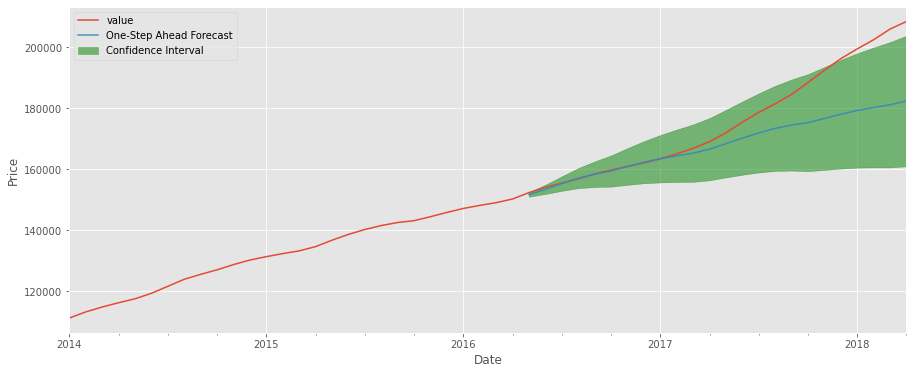

In [43]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = tseries_89104['2014':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-Step Ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5, label='Confidence Interval')

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()

Based on model validation using the test set, we see that the confidence intervals get bigger the farther we go along the time series. This is an indication that the model has room for improvement. However, for this particular project, we will proceed with it. 

In [44]:
#from sklearn.metrics import mean_absolute_error

#mae = mean_absolute_error(actual_values, predicted_values)
#print(mae)

# Forecasting Future (Zipcode 89104)

Now that we have tested our model, we can fit it onto the entire <b>tseries_89104</b> dataset.

In [45]:
# fit entire tseries_89104
# use same order and seasonal order parameters
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(tseries_89104, 
                                        order=(1, 1, 0), 
                                        seasonal_order=(1, 1, 0, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# fit model and print results
output_tseries_89104 = ARIMA_MODEL.fit()

print(output_tseries_89104.summary().tables[1])

C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9808      0.015     64.058      0.000       0.951       1.011
ar.S.L12      -0.5465      0.056     -9.719      0.000      -0.657      -0.436
sigma2      3.602e+05   2.72e+04     13.231      0.000    3.07e+05    4.14e+05


In [46]:
# getting a forecast for the next 5 years (60 months) after April 2018 (last record in time series data)
forecast = output_tseries_89104.get_forecast(60)
future_prediction = forecast.conf_int()
future_prediction['value'] = forecast.predicted_mean
future_prediction.columns = ['lower','upper','prediction'] 
future_prediction

,lower,upper,prediction
2018-05-01,210616.816693,212969.299061,211793.057877
2018-06-01,212568.342179,217788.316649,215178.329414
2018-07-01,213803.510966,222473.837170,218138.674068
2018-08-01,214656.936008,227256.954852,220956.945430
2018-09-01,215536.569584,232474.499144,224005.534364
2018-10-01,216422.416987,238054.030909,227238.223948
2018-11-01,217127.024211,243767.279613,230447.151912
2018-12-01,217531.126236,249461.968453,233496.547344
2019-01-01,217685.931327,255161.842046,236423.886687
2019-02-01,217730.125020,260982.243355,239356.184188


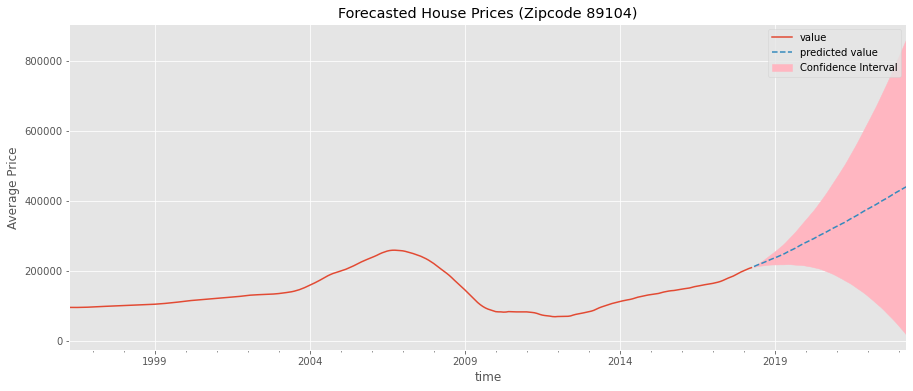

In [47]:
# plotting our forecast

fig, ax = plt.subplots()
tseries_89104.plot(ax=ax, label='Real Values')


future_prediction['prediction'].plot(ax=ax, label='predicted value', ls='--')

ax.fill_between(x=future_prediction.index, 
                y1=future_prediction['lower'], 
                y2=future_prediction['upper'], 
                color='lightpink',
                label='Confidence Interval')
ax.legend() 
plt.ylabel("Average Price")
plt.title("Forecasted House Prices (Zipcode 89104)")
plt.show()

# Forecasting Future (All Zipcodes)

Just like we used our model to forecast 89104 zipcode prices, we can now apply this model that we created to all the zipcodes in <b>clark_df_filtered</b>. Recall that this dataframe includes zipcodes in Clark County that had a 5-year ROI of 1.0 or greater. Using a function, <b>forecast_model()</b>, which has the <b>order</b> and <b>seasonal order</b> parameters set to the ones used in the final ARIMA model, we can apply the ARIMA model we made earlier

In [70]:
# Code adapted from Sanjit Varma 
# Source: https://github.com/sanjitva/Zillow-TimeSeries-Modeling/blob/main/final_notebook.ipynb

# getting ROIs for all zipcodes in clark_df_filtered and storing them in dictionary

zip_predictions = {}

# clark_zips: list of zipcodes in Clark County 
for zipcode in clark_zips:
    
    # use melt_data_2 function to melt each time series
    # clark_df_filtered: includes zipcodes with 5-yr ROI > 1.0
    series = melt_data_2(clark_df_filtered[clark_df_filtered['RegionName']== zipcode])
   
    # fit entire series on ARIMA model
    # order and seasonal order parameters are set to the values used for the chosen ARIMA model
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(series, 
                                            order=(1, 1, 0), 
                                            seasonal_order=(1, 1, 0, 12), 
                                            enforce_stationarity=False, 
                                            enforce_invertibility=False)

    # fit model and print results
    output = ARIMA_MODEL.fit()

    # getting forecast for the next 5 years (60 months) after April 2018
    forecast = output.get_forecast(60)
    prediction = forecast.conf_int()
    prediction['value'] = forecast.predicted_mean
    prediction.columns = ['lower','upper','prediction'] 
    
    # adding each zipcode's ROI to zip_predictions dictionary
    zip_predictions[zipcode] = ((prediction['prediction'][-1])
                                - (series['value'][-1]))/ (series['value'][-1])

C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: Valu

In [71]:
# looking at predicted 5 year ROI for each zipcode
zip_predictions

{89108: 1.1221640395105745,
 89121: 0.7336512989506395,
 89110: 0.8197447390150507,
 89119: 0.4973665854351183,
 89115: 0.3828736747319933,
 89104: 1.109970425199522,
 89102: 1.0906071823894152,
 89107: 1.2501005168227752,
 89142: 0.945461923408374,
 89156: 0.5707778456355725}

IndexError: list index out of range

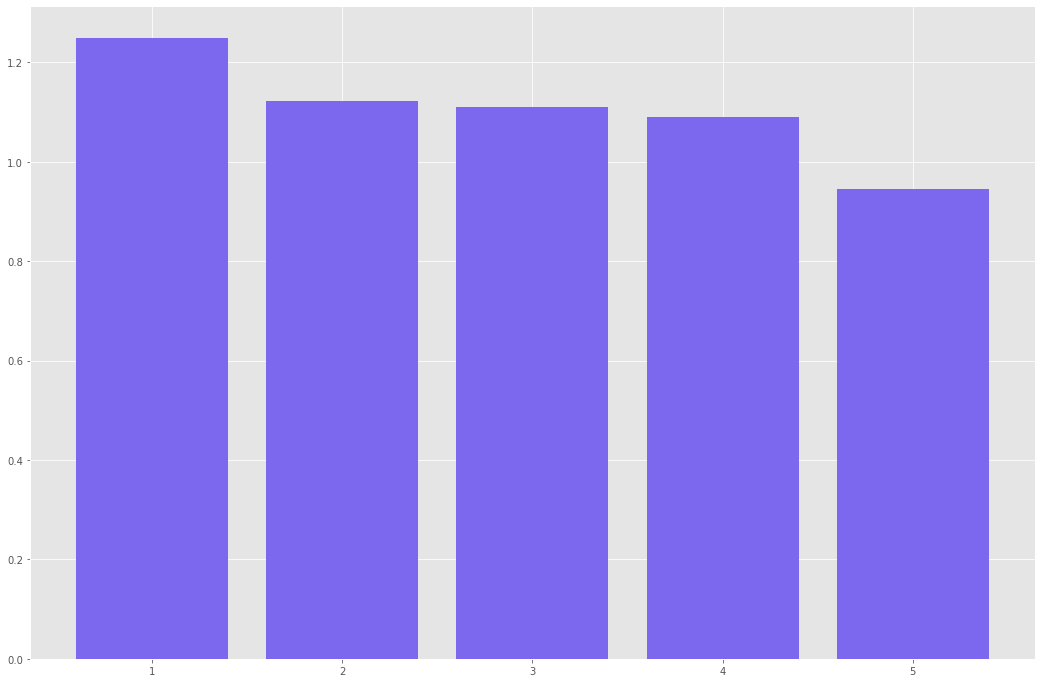

In [72]:
# Sorting our 3 year ROI forecast for zipcodes into descending order
sort_orders = sorted(zip_predictions.items(), key=lambda x: x[1], reverse=True)

sorted_forecast_3yr = {}
for i in sort_orders:
    sorted_forecast_3yr[i[0]] = i[1]

#Selecting only the Top 5 Zips
top_5_zipcodes = list(sorted_forecast_3yr.items())[:5]

fig, ax = plt.subplots(figsize=(18,12))

x_labels = [top_5_zipcodes[0][0],top_5_zipcodes[1][0],top_5_zipcodes[2][0],
            top_5_zipcodes[3][0],top_5_zipcodes[4][0]]
x = [1,2,3,4,5]
y = [top_5_zipcodes[0][1],top_5_zipcodes[1][1],top_5_zipcodes[2][1],
     top_5_zipcodes[3][1],top_5_zipcodes[4][1]]

ax.bar(x, y, color='mediumslateblue')
remaining_zipcodes = list(sorted_forecast_3yr.items())[5:]
median_ROI_other_zips = remaining_zipcodes[5][1]
ax.axhline(y=median_ROI_other_zips,label = 'Median ROI for remaining Zips')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_yticks([(a/100) for a in list(range(0,75,5))])
ax.set_yticklabels([str(a)+'%' for a in list(range(0,75,5))])
ax.set_title('Top 5 Recommendations', fontsize=20)
ax.set_ylabel('Average ROI', fontsize=20)
ax.set_xlabel('Zipcodes',fontsize=20)
ax.legend(prop={'size': 15});

In [65]:
# creating time series for the 9 remaining zipcodes in clark_df_filtered
# tseries_89104 was created earlier for modeling process
tseries_89108 = melt_data_2(clark_df_filtered[clark_df_filtered['RegionName']==89108])
tseries_89121 = melt_data_2(clark_df_filtered[clark_df_filtered['RegionName']==89121])
tseries_89110 = melt_data_2(clark_df_filtered[clark_df_filtered['RegionName']==89110])
tseries_89119 = melt_data_2(clark_df_filtered[clark_df_filtered['RegionName']==89119])
tseries_89115 = melt_data_2(clark_df_filtered[clark_df_filtered['RegionName']==89115])
tseries_89102 = melt_data_2(clark_df_filtered[clark_df_filtered['RegionName']==89102])
tseries_89107 = melt_data_2(clark_df_filtered[clark_df_filtered['RegionName']==89107])
tseries_89142 = melt_data_2(clark_df_filtered[clark_df_filtered['RegionName']==89142])
tseries_89156 = melt_data_2(clark_df_filtered[clark_df_filtered['RegionName']==89156])

In [63]:
# Code adapted from Fernando Aguilar
# Source: https://medium.com/@feraguilari/time-series-analysis-modfinalproyect-b9fb23c28309

def forecast_model(df, pdq=(1, 1, 0), pdqs=(1, 1, 0, 12), display=True):
    model = sm.tsa.statespace.SARIMAX(df, order=pdq, seasonal_order=pdqs)
    model_fit = model.fit()
    output = model_fit.get_prediction(start='2018-04', end='2023-04', dynamic=True)
    forecast_ci = output.conf_int()
    if display:
        fig, ax = plt.subplots(figsize=(13,6))
        output.predicted_mean.plot(label='Forecast')
        ax.fill_between(forecast_ci.index,forecast_ci.iloc[:, 0],forecast_ci.iloc[:, 1],
                        color='k', alpha=.25,label='Conf Interval')
        plt.title('Forecast of Monthly Returns')
        plt.xlabel('Time')
        plt.legend(loc='best')
        plt.show()
    year_1 = ((1+output.predicted_mean[:12]).prod())-1
    year_3 = ((1+output.predicted_mean[:36]).prod())-1
    year_5 = ((1+output.predicted_mean[:60]).prod())-1
    print(f'Total expected return in 1 year: {year_1}')
    print(f'Total expected return in 3 years: {year_3}')
    print(f'Total expected return in 5 year: {year_5}')
    tot_ret = [year_1, year_3, year_5]
    return tot_ret

C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\micha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


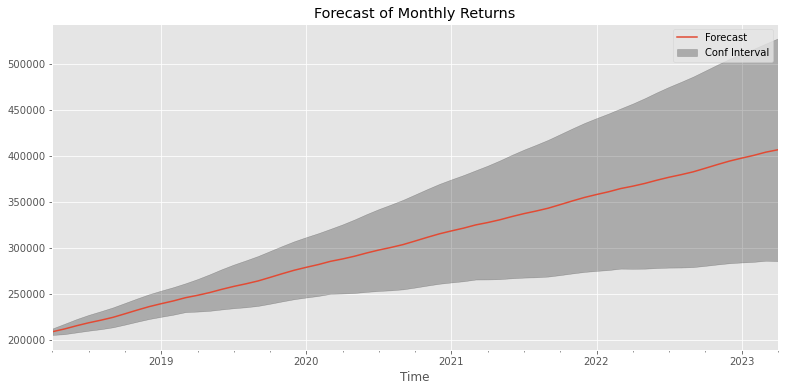

Total expected return in 1 year: 1.823590568065232e+64
Total expected return in 3 years: 1.534614798459304e+195
Total expected return in 5 year: inf


[1.823590568065232e+64, 1.534614798459304e+195, inf]

In [64]:
forecast_model(tseries_89104)

# Recommendations

Find Top 5 zipcodes

# Limitations and Improvements

The final model used for forecasting had many issues (wide confidence intervals). Can only be used to project small amounts of time (still useful in this sense). 

Model for determining best zipcode can be improved 

Recommendations still solid because the zipcodes are in the Top 10 of ROI from 2013-2018 (assuming continuing trend).